# K-means is a popular clustering algorithm in machine learning and data analysis. It is used to partition a set of data points into distinct groups or clusters based on their similarity. The primary goal of K-means is to group similar data points together while keeping dissimilar points in different clusters. This technique is widely used for various purposes, such as customer segmentation, image compression, and anomaly detection.

Here's how the K-means algorithm works:

1. **Initialization**: It starts with the selection of a predetermined number of clusters, often denoted as "k." These clusters are initially created by randomly selecting k data points as the initial cluster centroids. These centroids represent the center of each cluster.

2. **Assignment**: For each data point in the dataset, K-means calculates the distance between the data point and all the cluster centroids. The data point is assigned to the cluster with the nearest centroid based on some distance metric, typically Euclidean distance.

3. **Update Centroids**: After all data points are assigned to clusters, the centroids of the clusters are updated. The new centroid for each cluster is computed as the mean of all data points assigned to that cluster. This step recalculates the center of each cluster based on the data points assigned to it.

4. **Repeat**: Steps 2 and 3 are repeated iteratively until a stopping criterion is met. Common stopping criteria include a maximum number of iterations or when the centroids no longer change significantly.

5. **Result**: Once the algorithm converges (i.e., centroids no longer change significantly or the maximum number of iterations is reached), the final clusters are determined, and each data point belongs to one of these clusters.

The choice of the number of clusters (k) is a crucial decision in K-means, and various techniques, such as the elbow method or silhouette analysis, can be used to determine an appropriate value for k.

K-means is a relatively simple and efficient clustering algorithm, but it has some limitations, such as sensitivity to initial centroid placement and difficulties with non-spherical clusters or clusters of different sizes. Researchers have developed variants of K-means to address these issues, such as K-means++, which improves the initial centroid selection, and hierarchical K-means, which can handle clusters of varying sizes.

In [3]:
import numpy as np
import pandas as pd


1. **Player**: This column likely contains the names or identifiers of the cricket players. Each row in the dataset corresponds to a specific player.

2. **Span**: The "Span" column typically indicates the time period during which a player's career spanned. It might show the starting year and ending year of a player's international cricket career.

3. **Mat**: "Mat" stands for Matches and represents the total number of matches the player participated in during their career.

4. **Inns**: "Inns" is short for Innings and represents the total number of innings the player has batted in during their career.

5. **NO**: "NO" stands for Not Out and indicates the number of times the player remained not out (i.e., they were at the crease when the team's innings ended) during their career.

6. **Runs**: This column represents the total number of runs scored by the player in their career.

7. **HS**: "HS" stands for Highest Score and denotes the highest number of runs a player scored in a single inning throughout their career.

8. **Ave**: "Ave" represents the player's batting average, which is calculated by dividing the total runs scored by the number of times they were dismissed (Inns - NO). It is a measure of a player's consistency in scoring runs.

9. **BF**: "BF" stands for Balls Faced and represents the total number of deliveries (balls) the player faced during their innings in all matches.

10. **SR**: "SR" stands for Strike Rate and is a measure of how quickly a player scores runs. It is calculated as (Runs / BF) * 100.

11. **100**: This column likely indicates the number of centuries (innings in which the player scored 100 or more runs) scored by the player during their career.

12. **50**: Similarly, this column likely indicates the number of half-centuries (innings in which the player scored 50 to 99 runs) scored by the player during their career.

13. **0**: This column might represent the number of times the player scored zero runs (i.e., got out without scoring) during their career.

Overall, this dataset provides insights into the performance of different cricket players, including their total runs, batting averages, centuries, half-centuries, and more, over a specific time period. It's commonly used for analyzing and comparing the batting performance of cricket players.

In [5]:
# importing the dataset

df = pd.read_csv("Cricket.csv", encoding='latin1')

In [7]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [9]:
df.shape

(79, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.2+ KB


In [13]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [15]:
# null values

df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [17]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True)

In [19]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Strt    79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [23]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']


In [25]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Strt,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [27]:
df=df.drop(['Strt','End','Span'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['HS']=df['HS'].str.replace("*","",regex=True)
df['HS']=df['HS'].astype('int')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 7.8+ KB


In [38]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133*,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96*,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120*,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [ ]:
plt.figure(figsize = (30,5))
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#('(\d+)')
#Parentheses()=special character
#backslash=\d:
#plus+

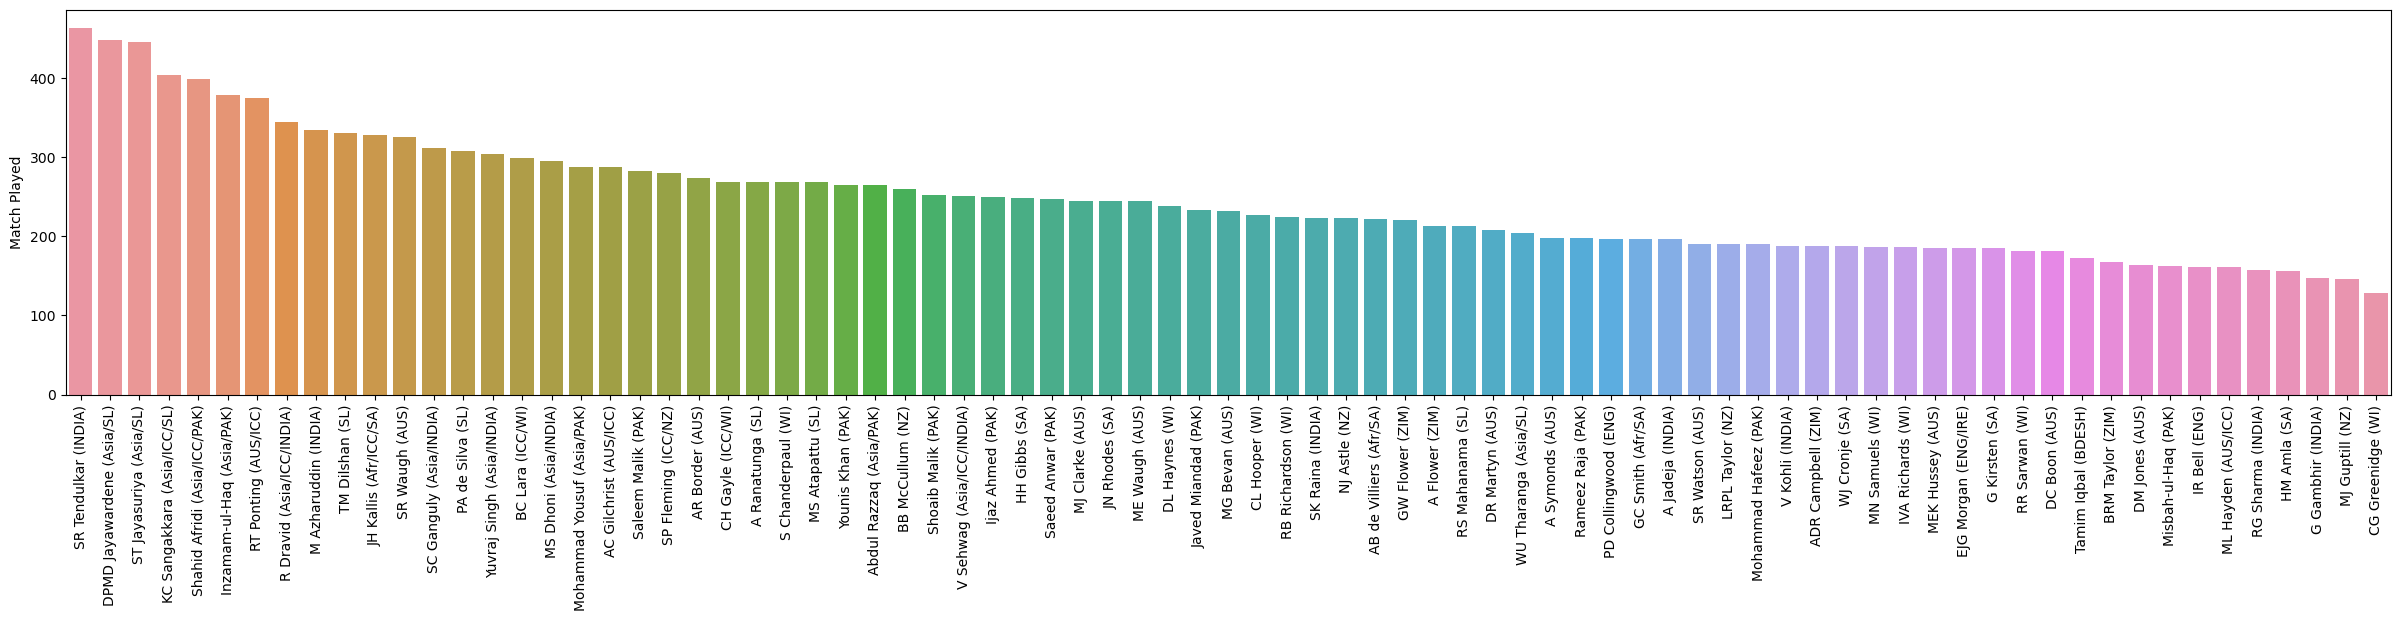

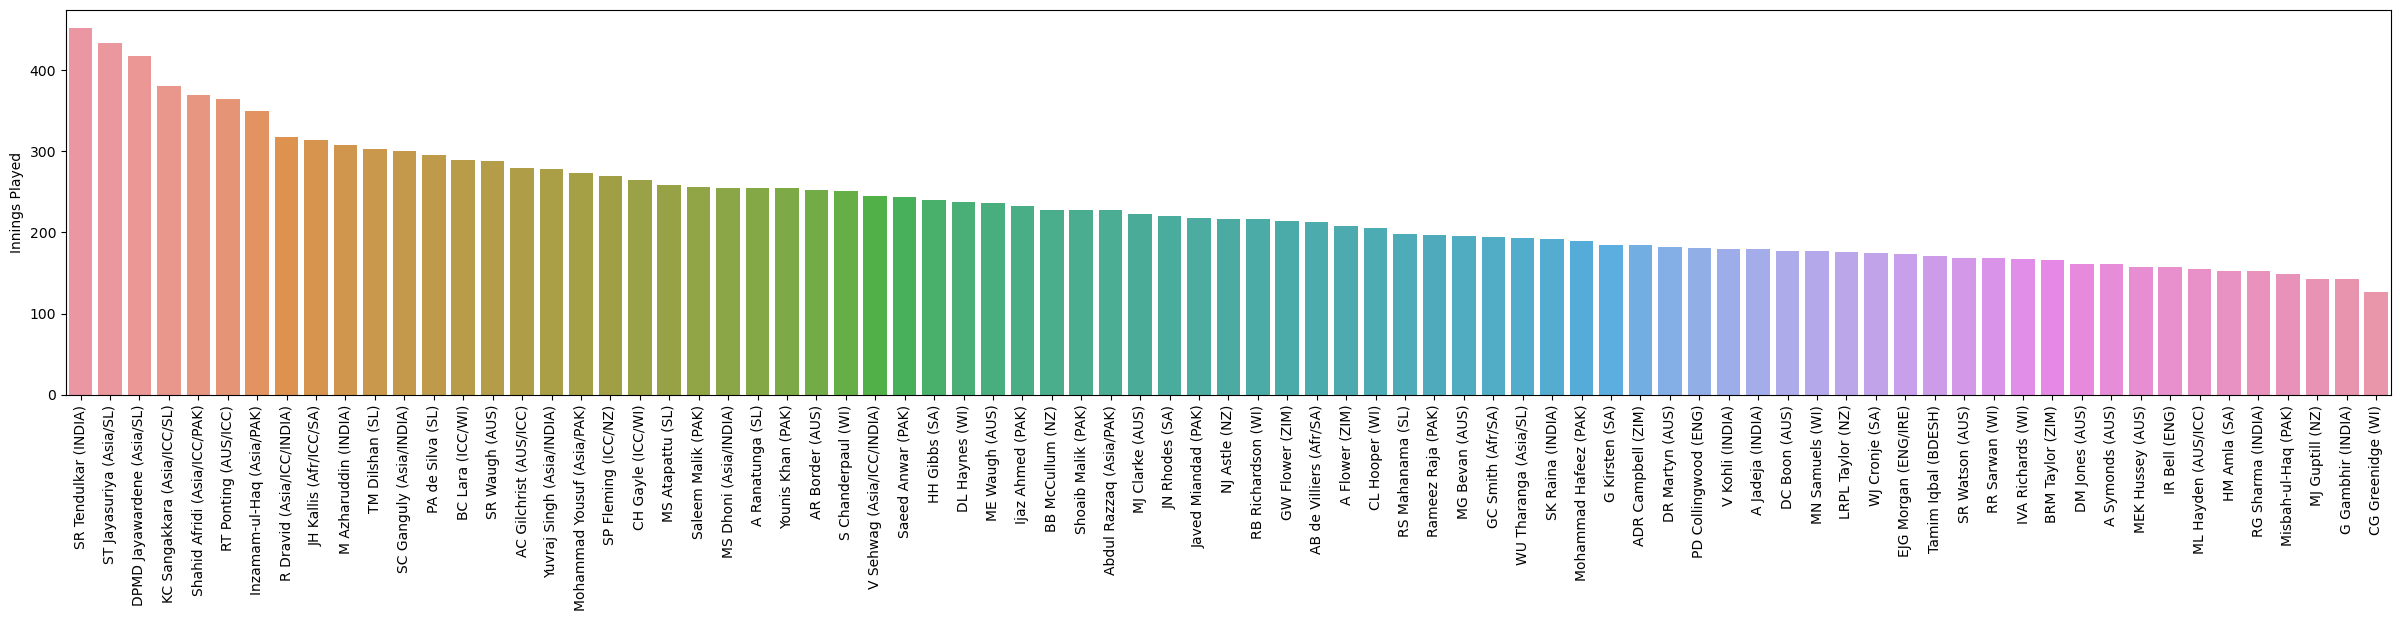

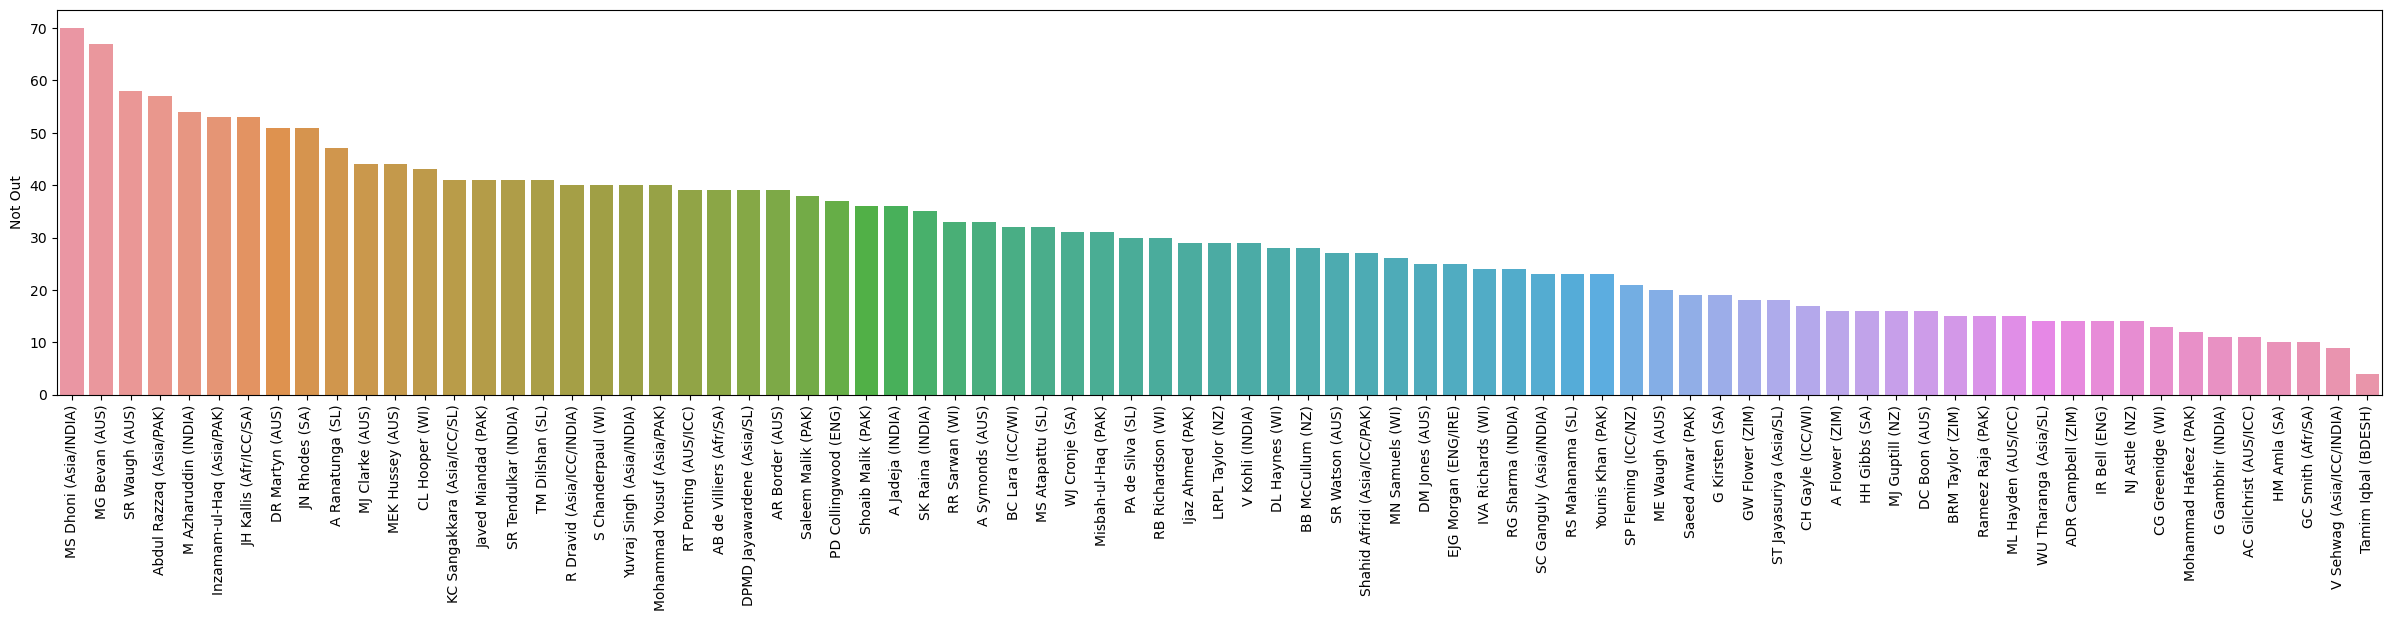

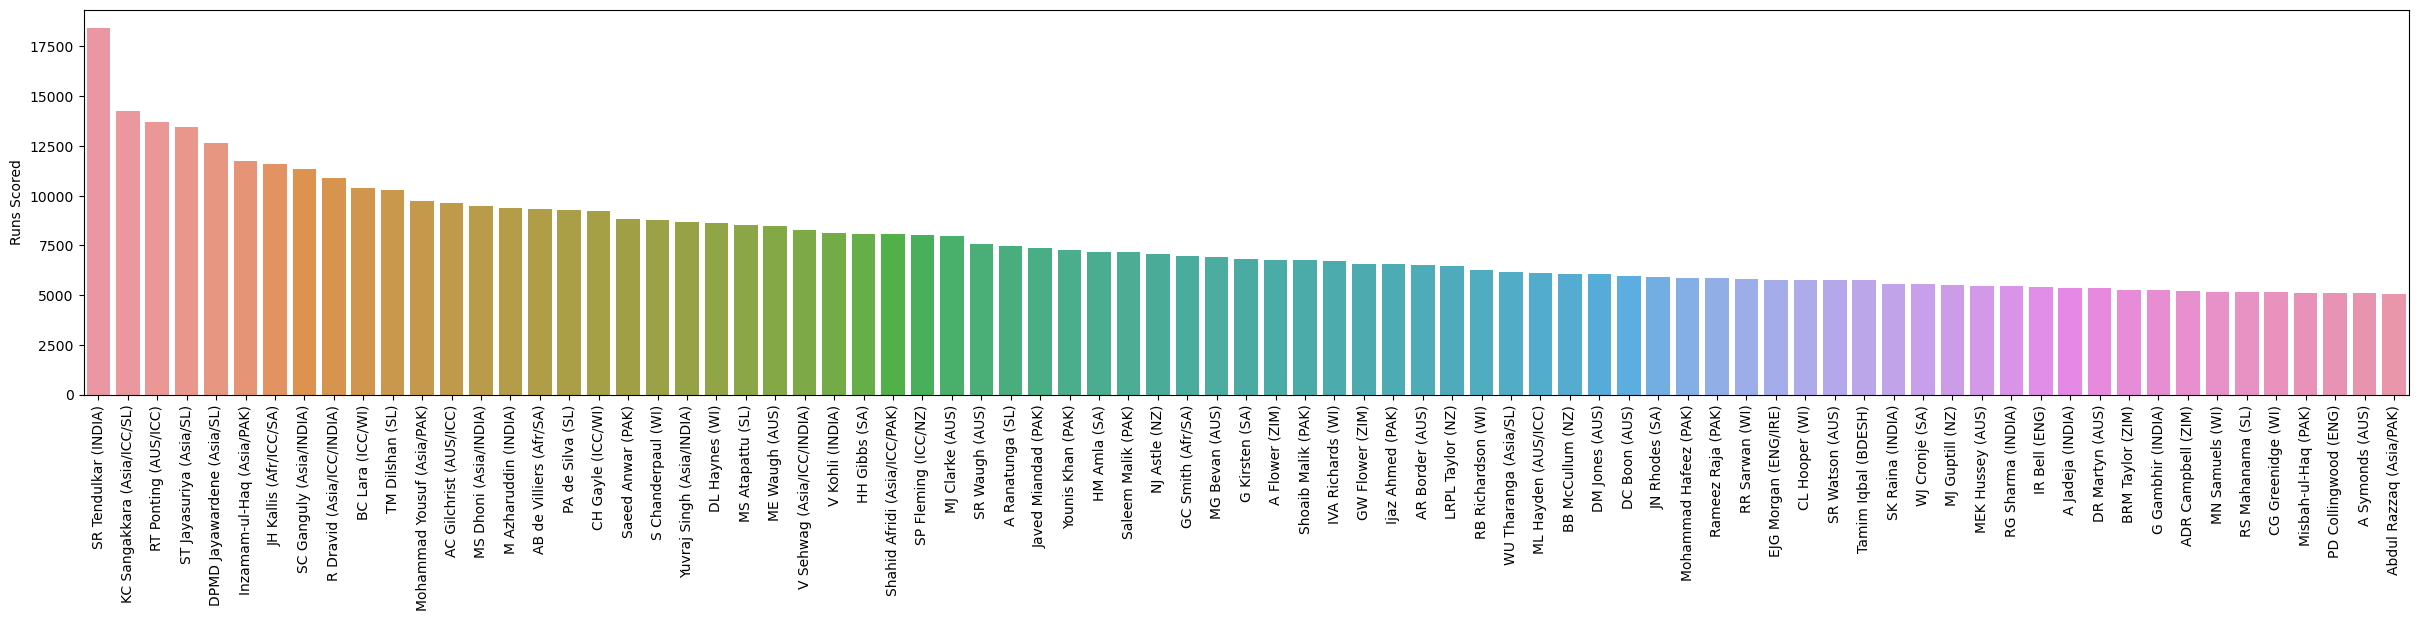

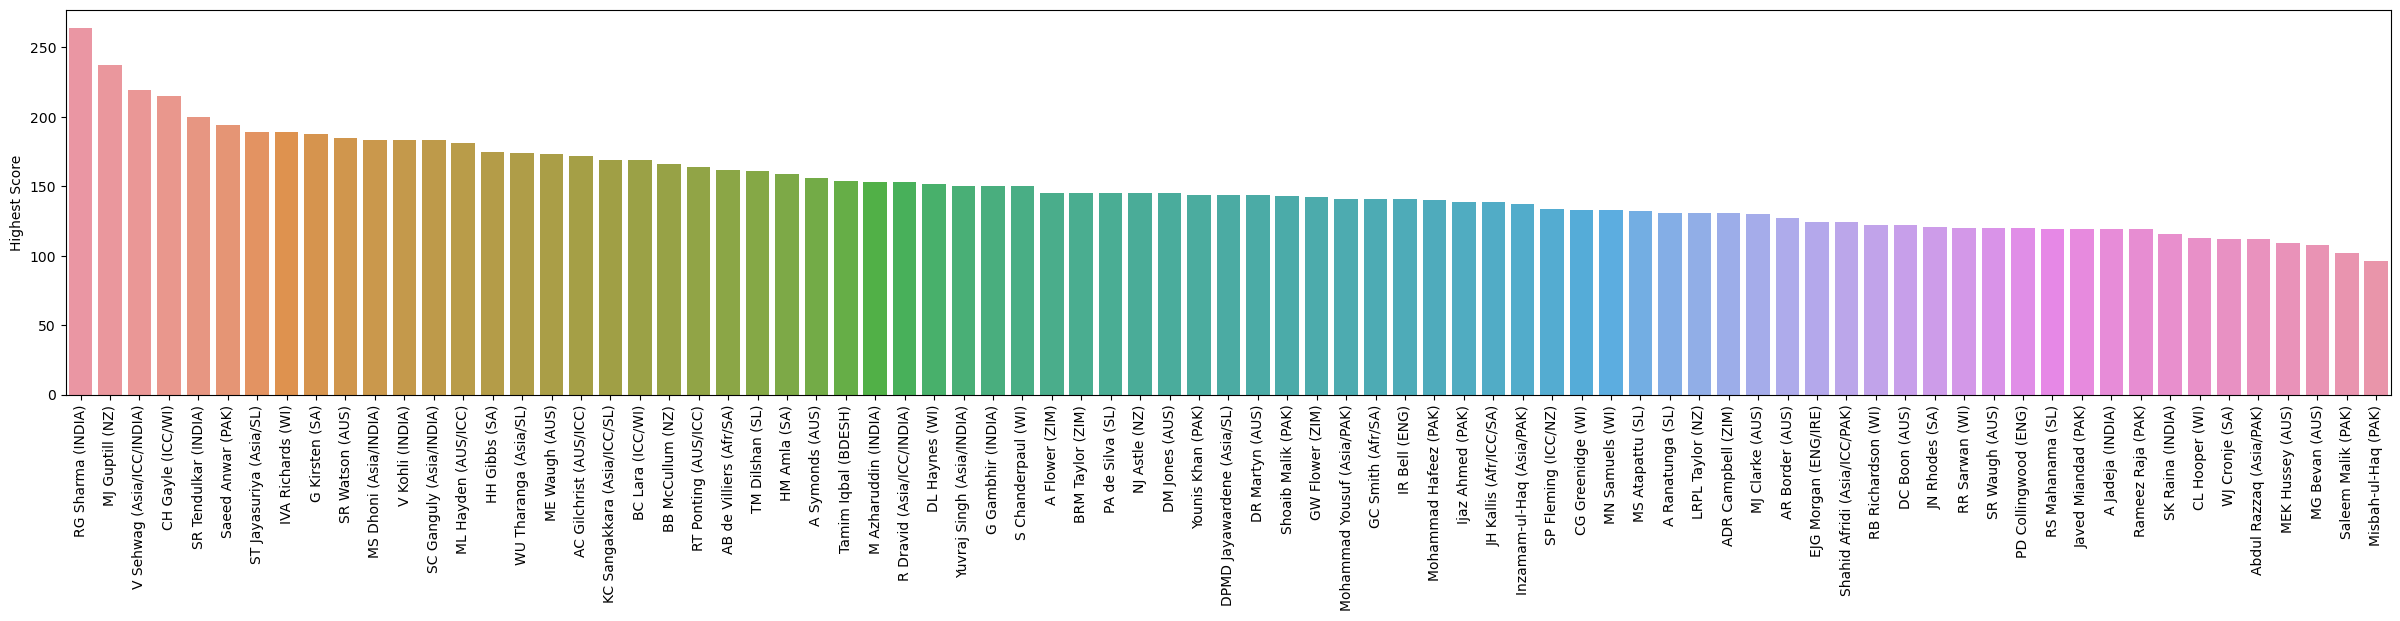

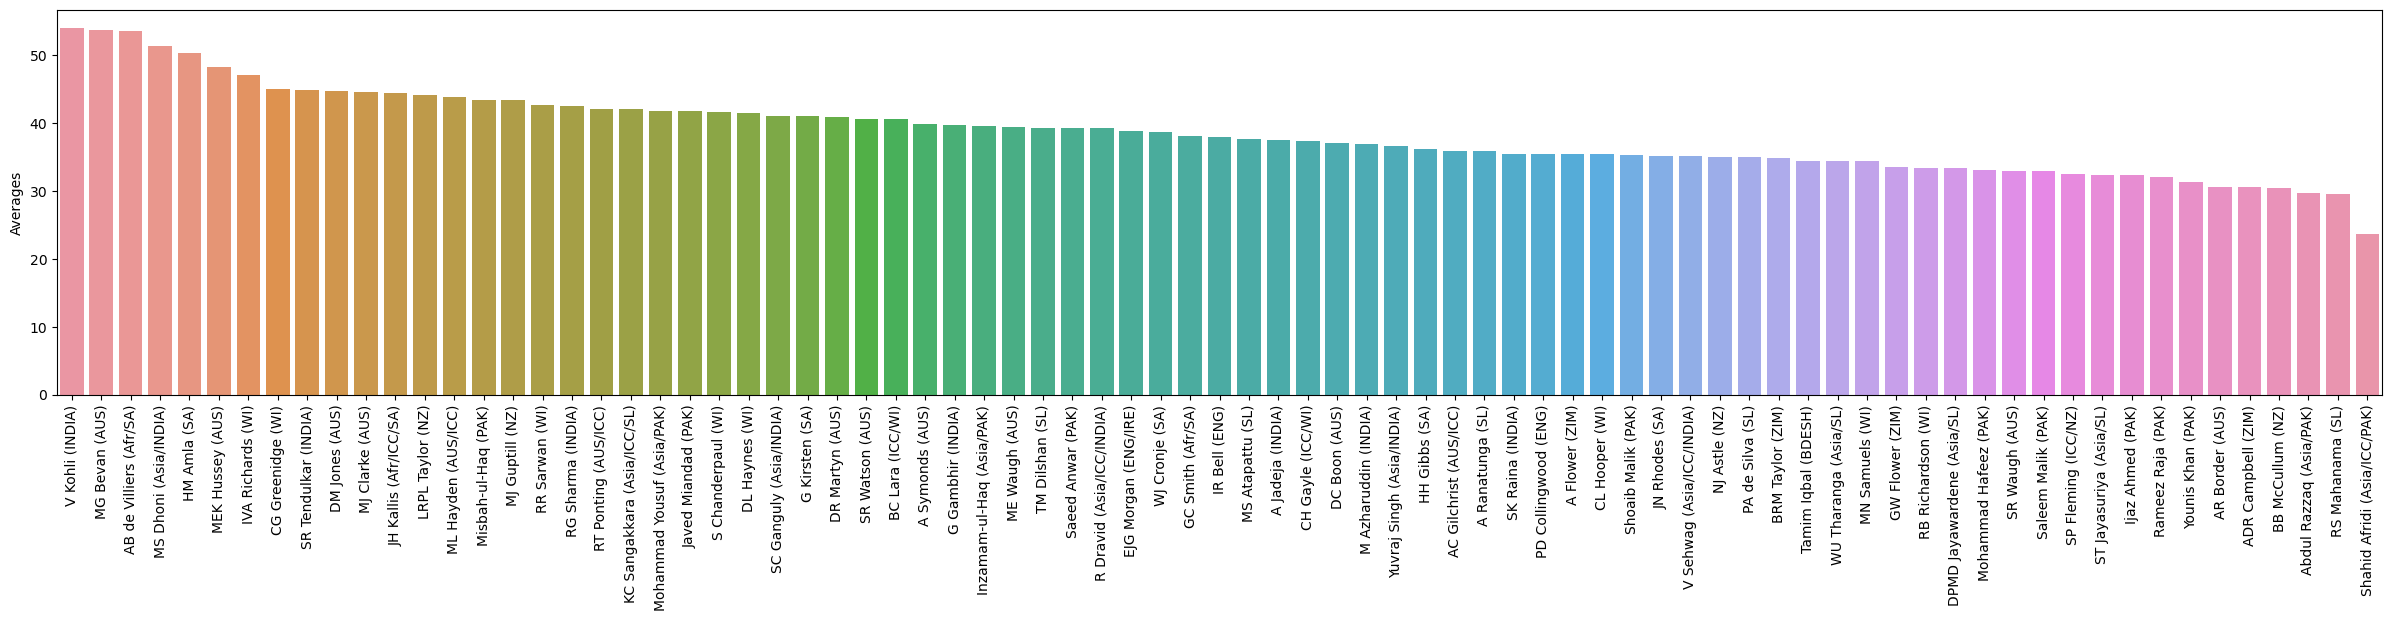

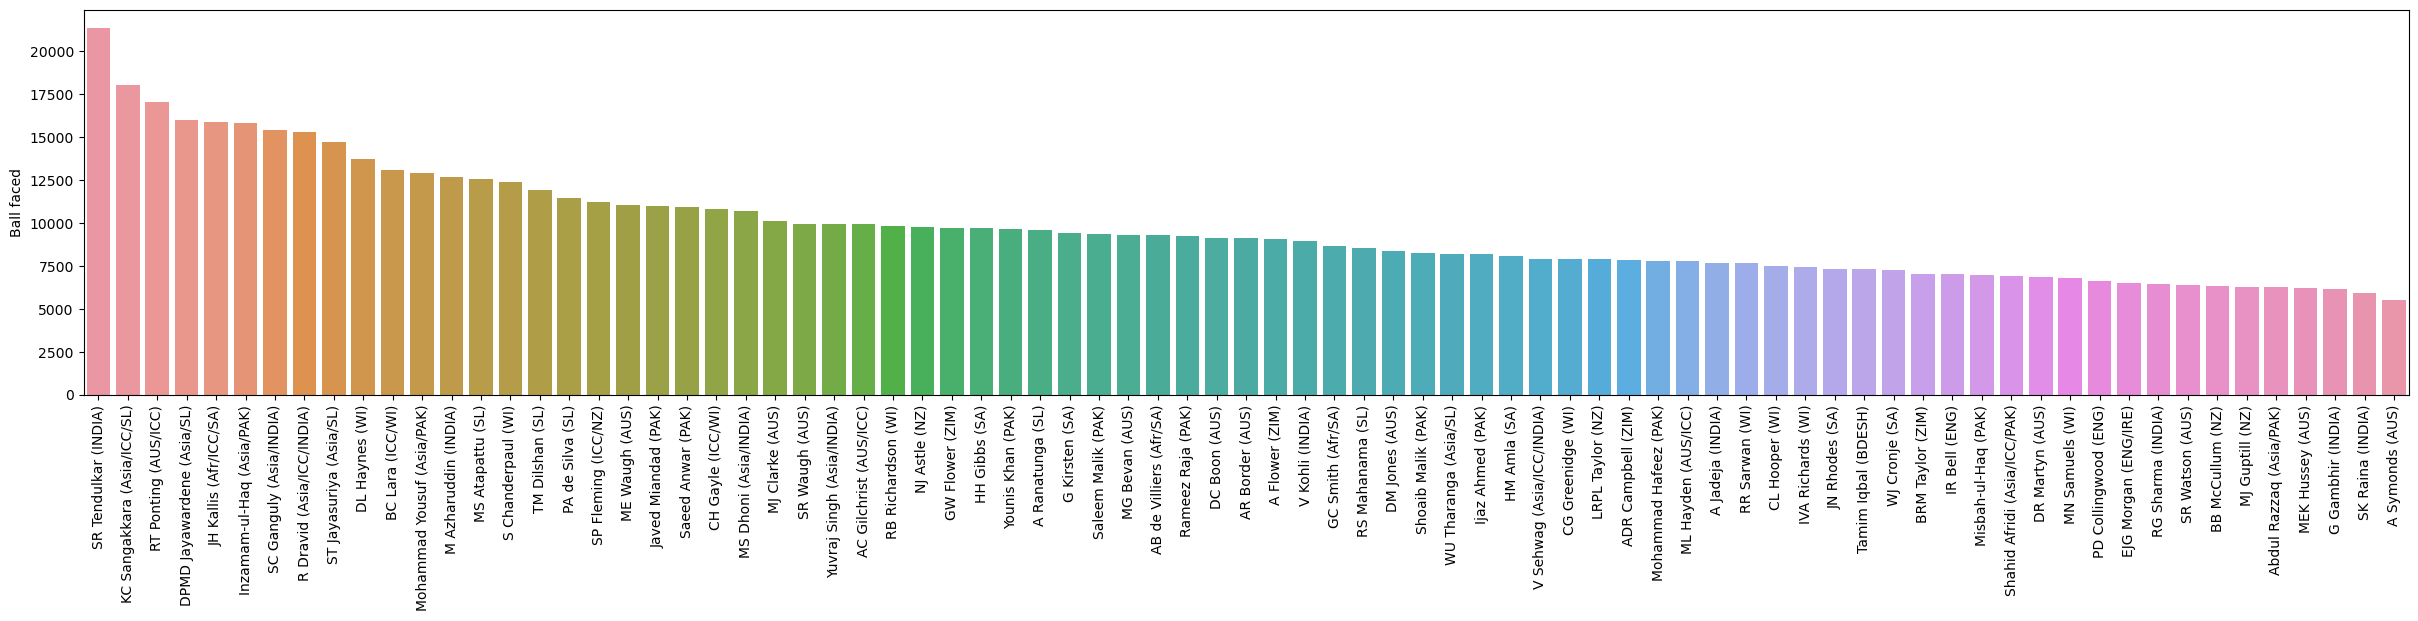

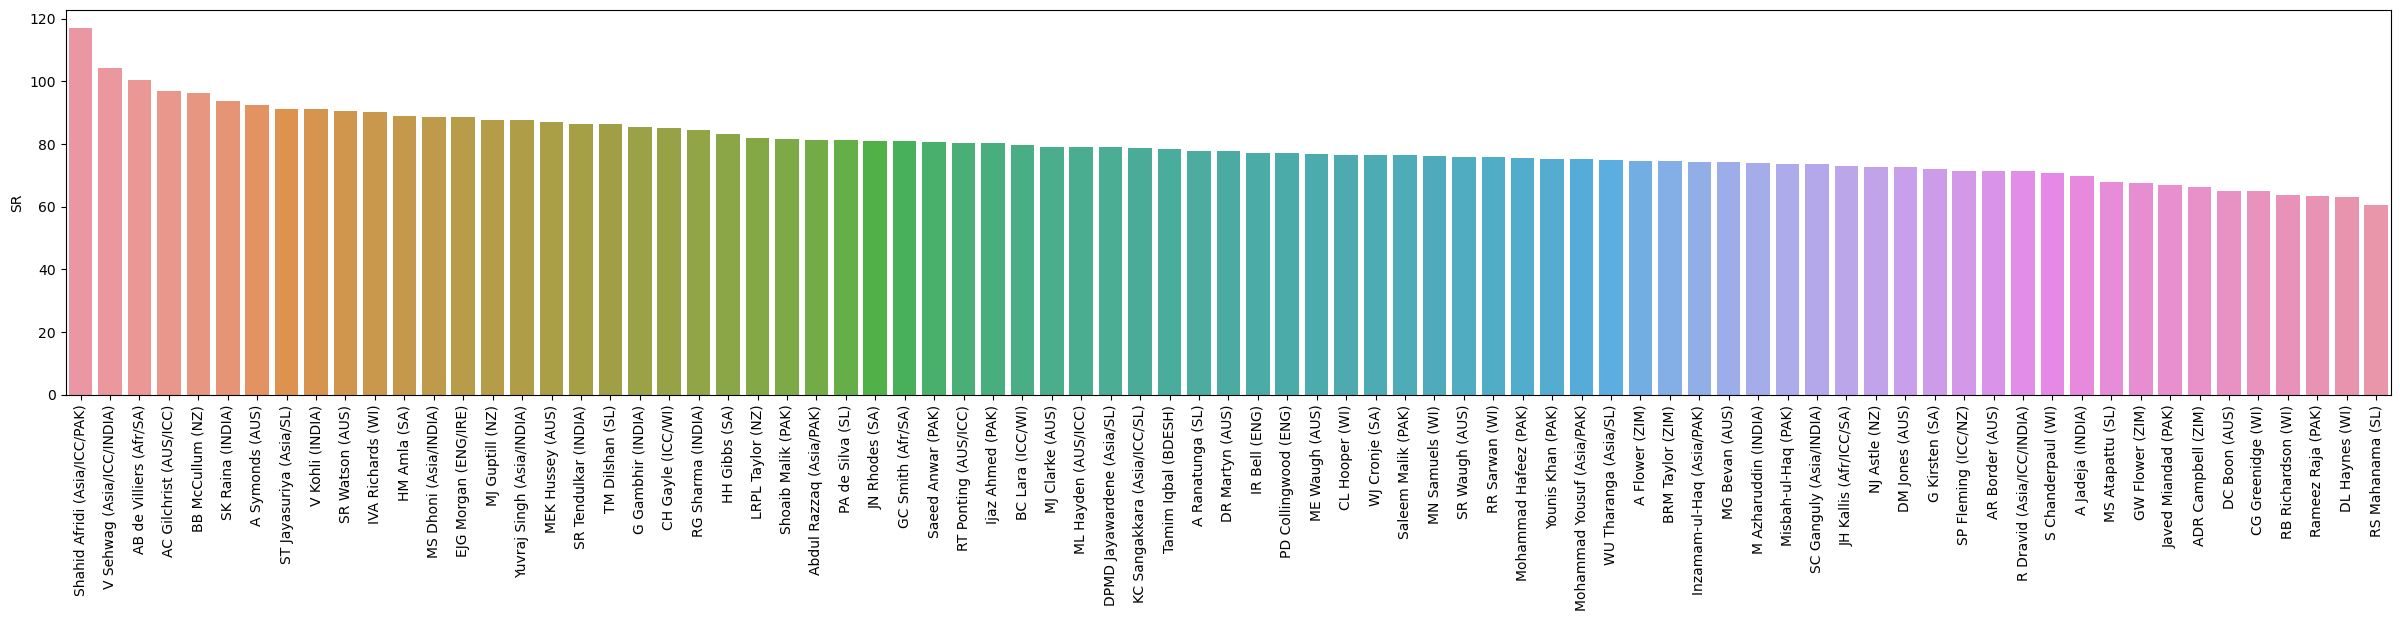

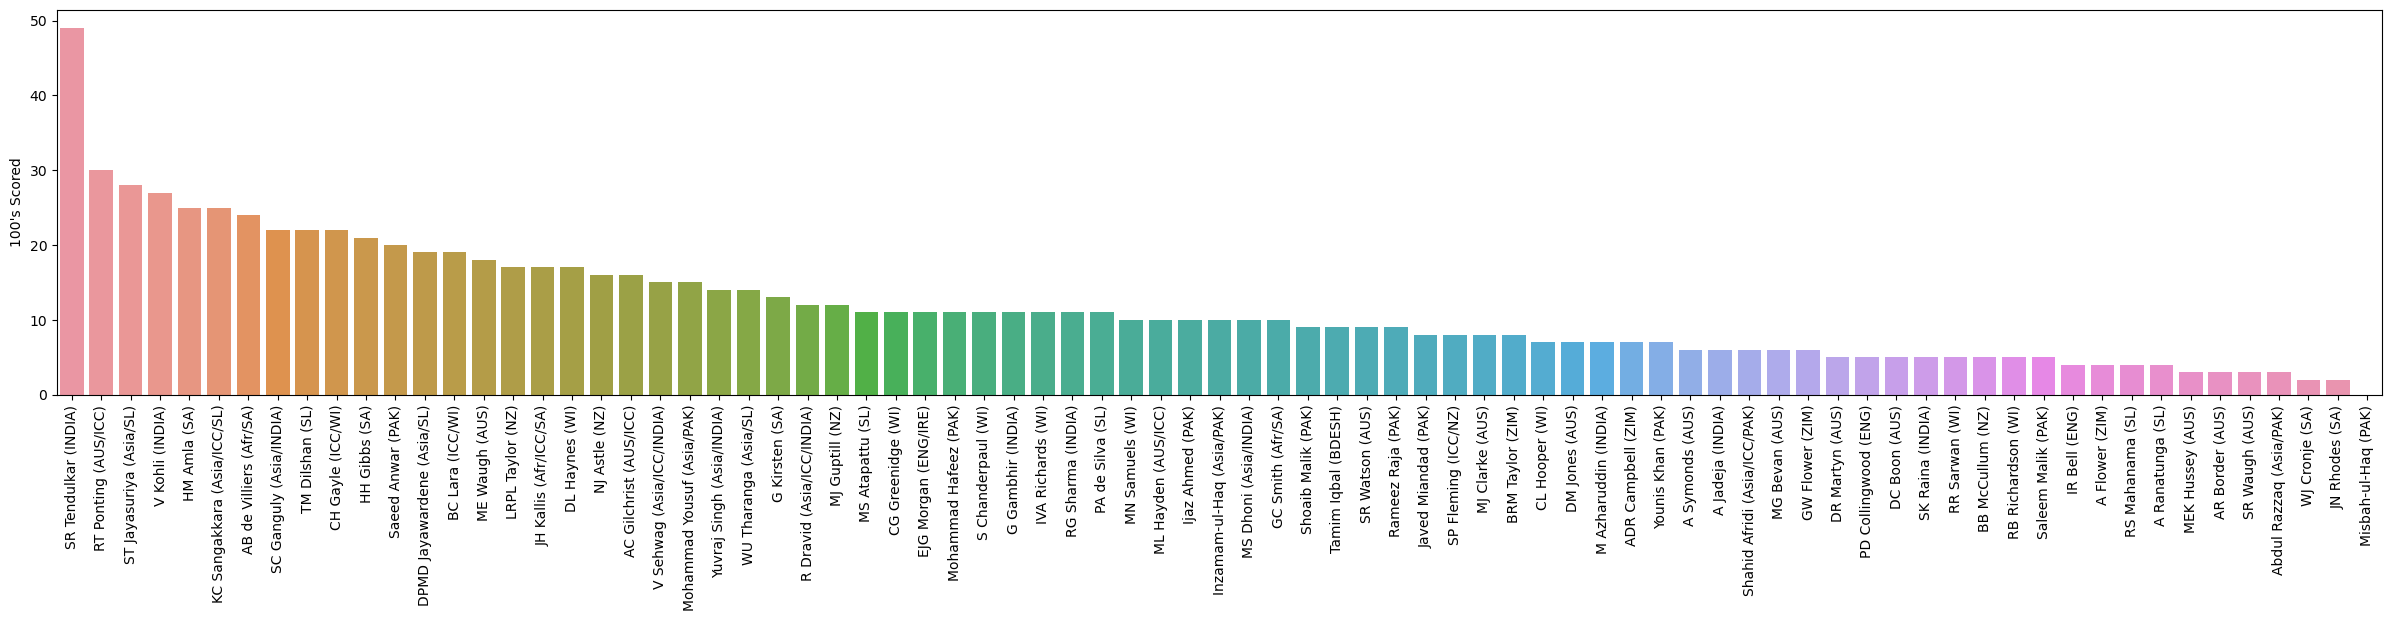

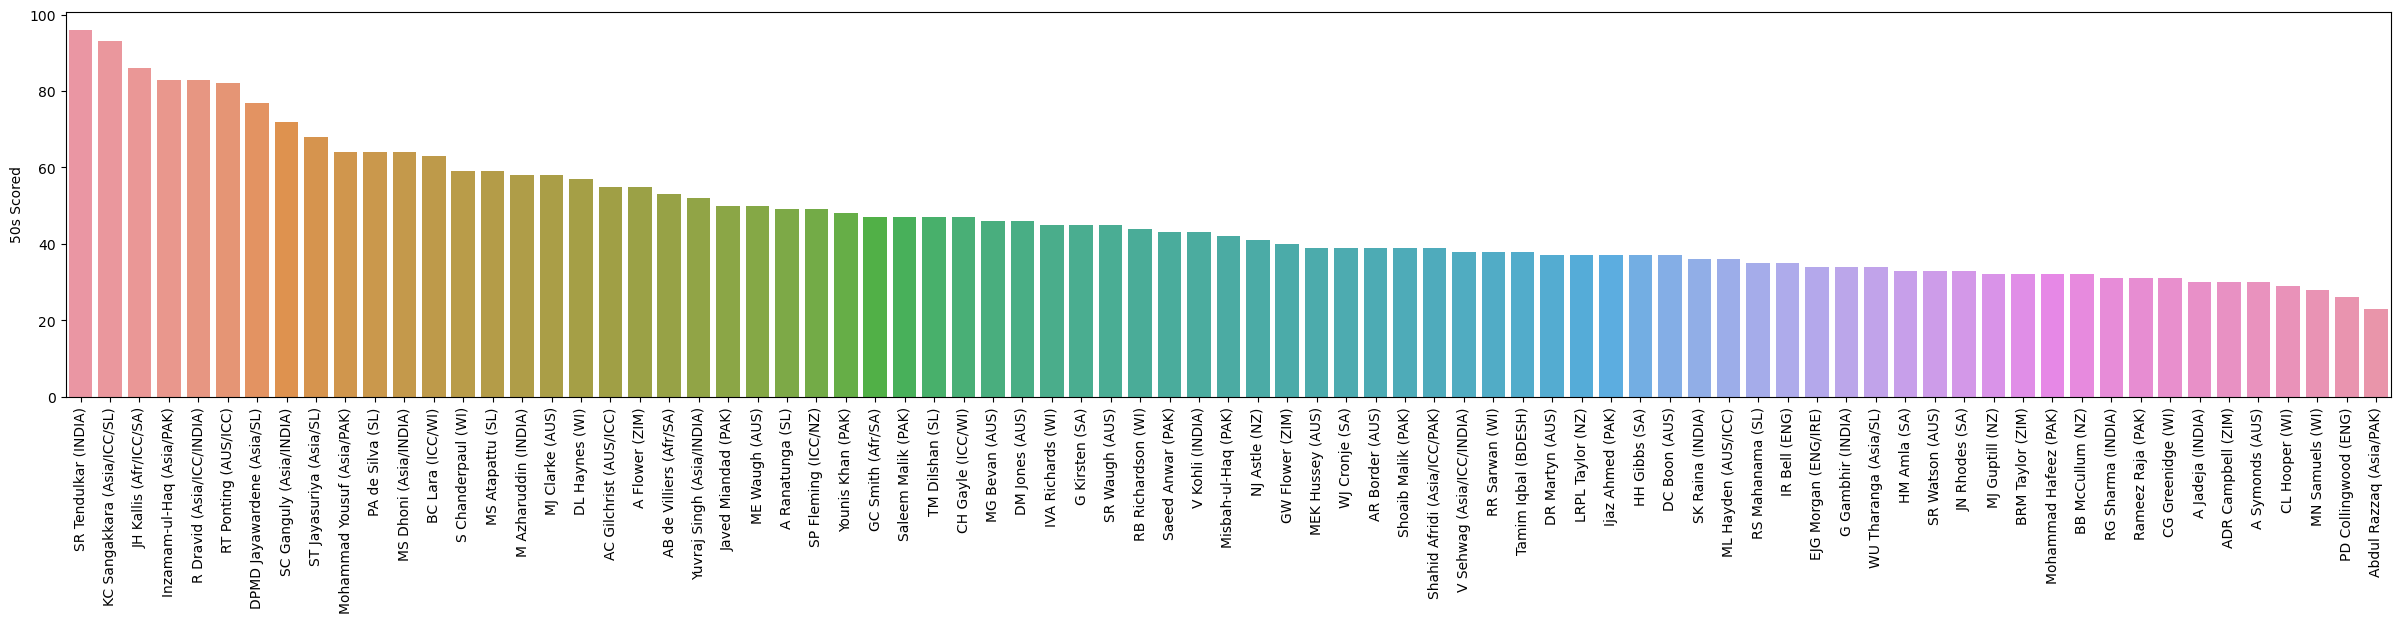

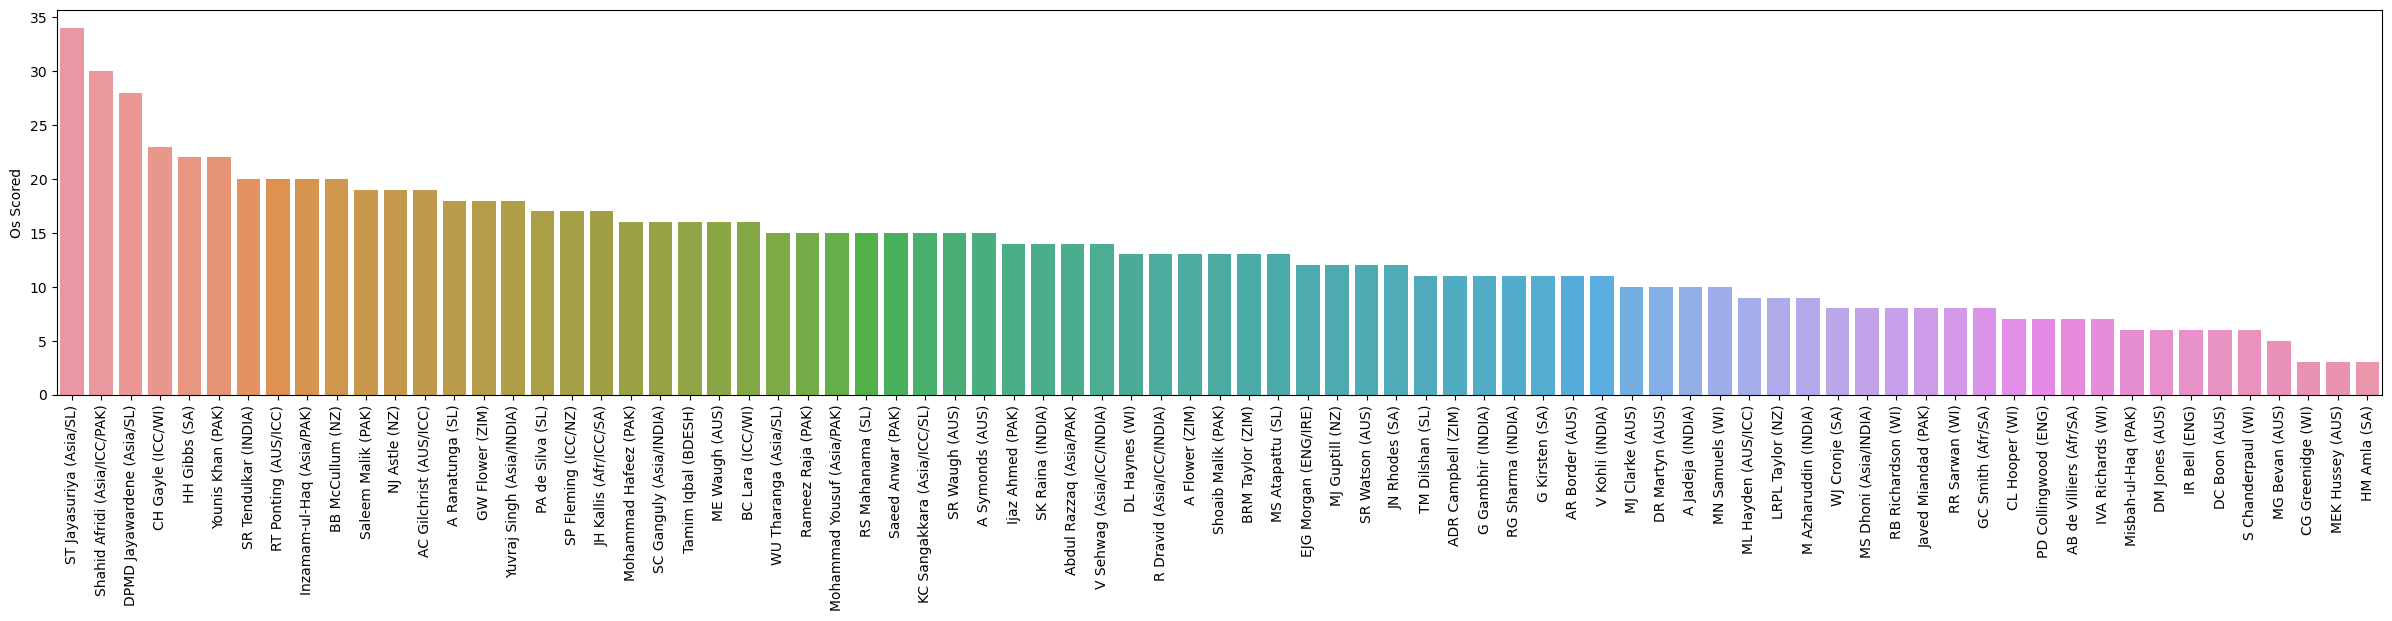

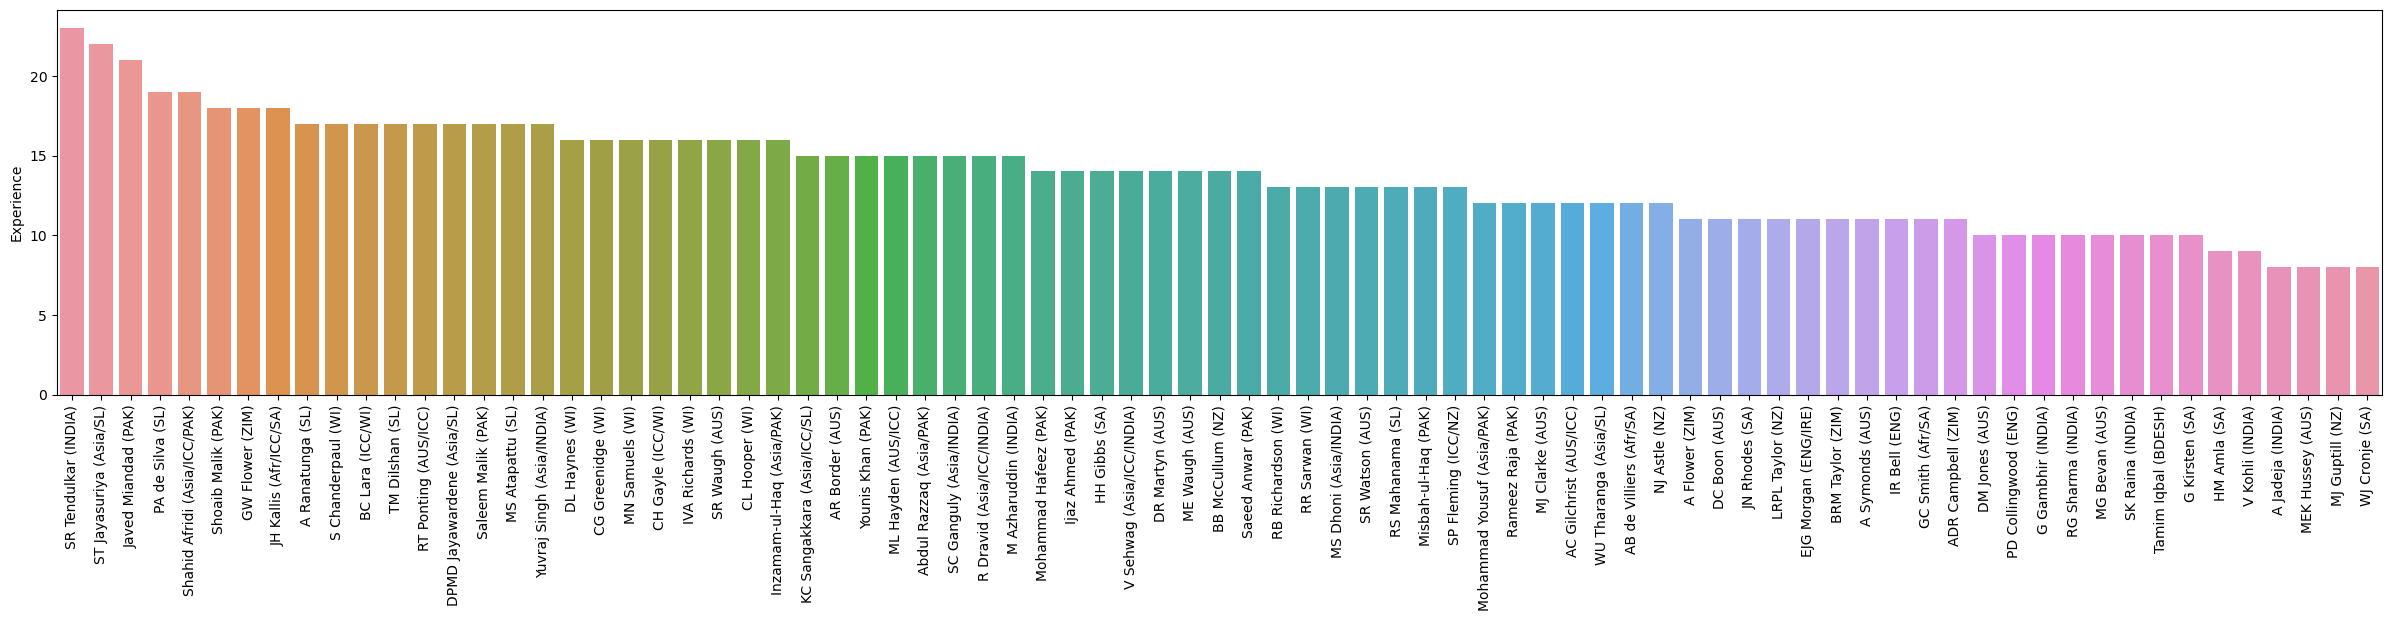

In [96]:
# defining no.of subplots we want
#plt.subplot(1, 1, 1)
#Match Played

plt.figure(figsize = (30,5))
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()


#Inns
#plt.subplot(1, 2, 2)
plt.figure(figsize = (30,5))
inns = df[['Player','Inns']].sort_values('Inns', ascending = False)
ax = sns.barplot(x='Player', y='Inns', data= inns)
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

#NO
#plt.subplot(1, 3, 3)
plt.figure(figsize = (30,5))
no = df[['Player','NO']].sort_values('NO', ascending = False)
ax = sns.barplot(x='Player', y='NO', data= no)
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

#Runs
#plt.subplot(2, 1, 1)
plt.figure(figsize = (30,5))
run = df[['Player','Runs']].sort_values('Runs', ascending = False)
ax = sns.barplot(x='Player', y='Runs', data= run)
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()

#HS
#plt.subplot(2, 2, 2)
#df.HS=df.HS.str.extract('(\d+)')
#df.HS=df.HS.astype(int)
plt.figure(figsize = (30,5))
hs = df[['Player','HS']].sort_values('HS', ascending = False)
ax = sns.barplot(x='Player', y='HS', data= hs)
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

#Ave
#plt.subplot(2, 3, 3)
plt.figure(figsize = (30,5))
ave = df[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= ave)
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

#BF
#plt.subplot(3, 1, 1)
plt.figure(figsize = (30,5))
bf = df[['Player','BF']].sort_values('BF', ascending = False)
ax = sns.barplot(x='Player', y='BF', data= bf)
ax.set(xlabel = '', ylabel= 'Ball faced')
plt.xticks(rotation=90)
plt.show()

#SR
#plt.subplot(3, 2, 2)
plt.figure(figsize = (30,5))
sr = df[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= sr)
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

#100
#plt.subplot(3, 3, 3)
plt.figure(figsize = (30,5))
r100 = df[['Player','100']].sort_values('100', ascending = False)
ax = sns.barplot(x='Player', y='100', data= r100)
ax.set(xlabel = '', ylabel= "100's Scored" )
plt.xticks(rotation=90)
plt.show()

#50
#plt.subplot(4, 1, 1)
plt.figure(figsize = (30,5))
r50 = df[['Player','50']].sort_values('50', ascending = False)
ax = sns.barplot(x='Player', y='50', data= r50)
ax.set(xlabel = '', ylabel= "50s Scored")
plt.xticks(rotation=90)
plt.show()

#0
#plt.subplot(4, 2, 2)
plt.figure(figsize = (30,5))
r0 = df[['Player','0']].sort_values('0', ascending = False)
ax = sns.barplot(x='Player', y='0', data= r0)
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

#Exp
#plt.subplot(4, 3, 3)
plt.figure(figsize = (30,5))
exp = df[['Player','Exp']].sort_values('Exp', ascending = False)
ax = sns.barplot(x='Player', y='Exp', data= exp)
ax.set(xlabel = '', ylabel= 'Experience')
plt.xticks(rotation=90)
plt.show()



C:\Users\Dell\AppData\Local\Temp\ipykernel_12580\4191478016.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="rainbow")


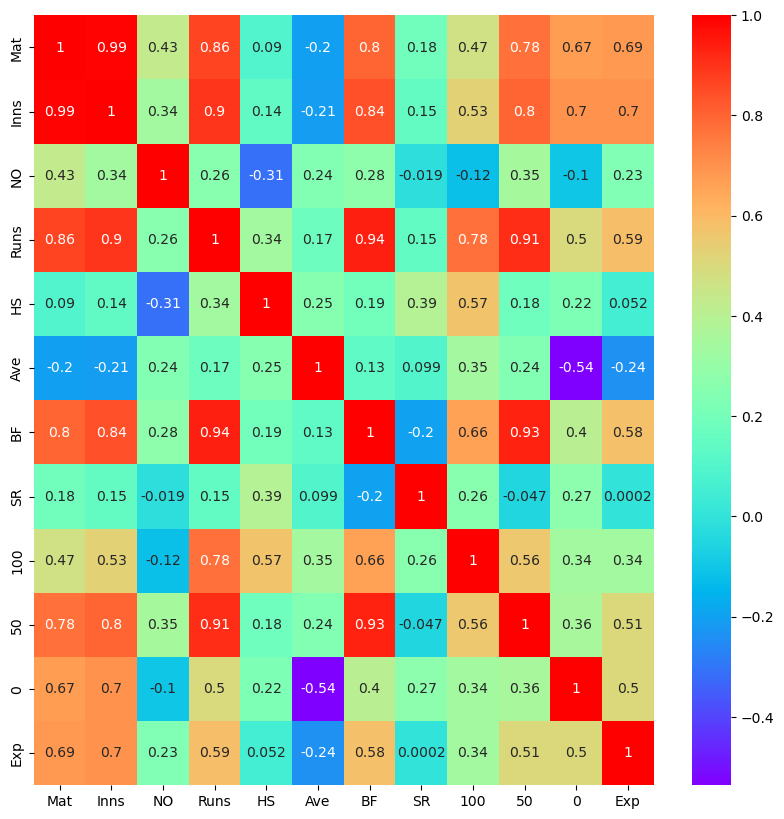

In [12]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [13]:
# Checking outliers

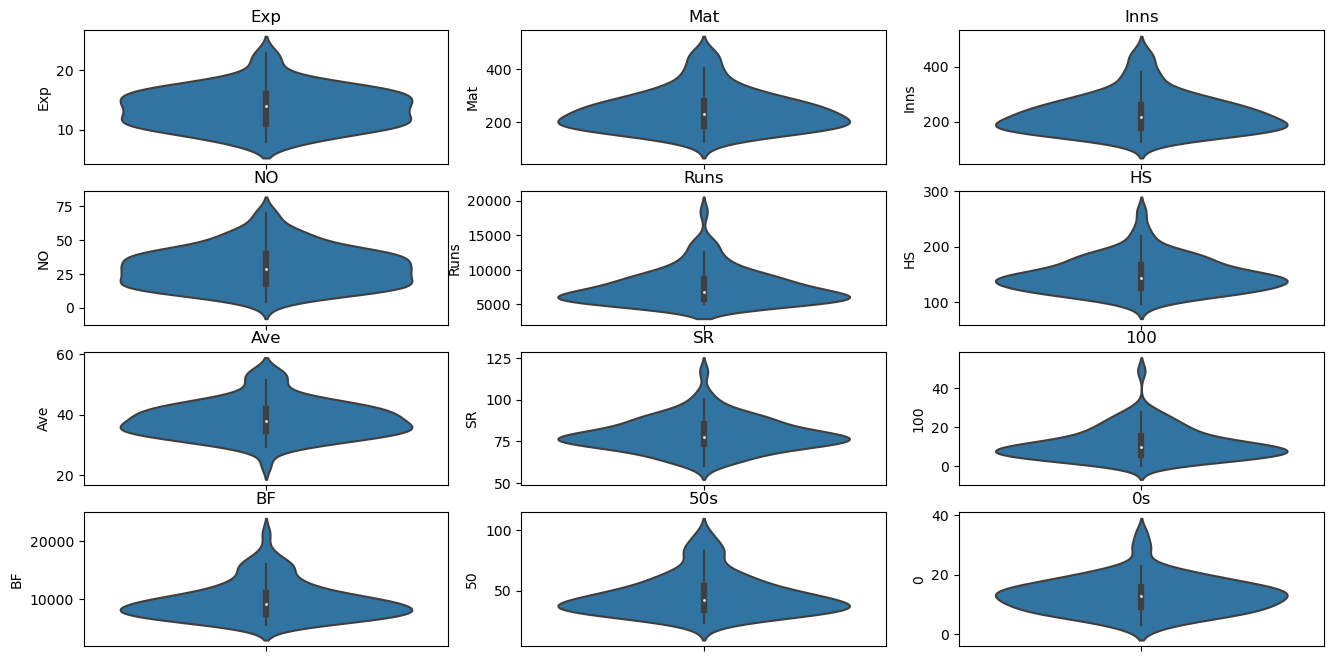

In [14]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [97]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [17]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [18]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [19]:
# Rescaling the Features

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [98]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


In [23]:
# Model Building

In [24]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

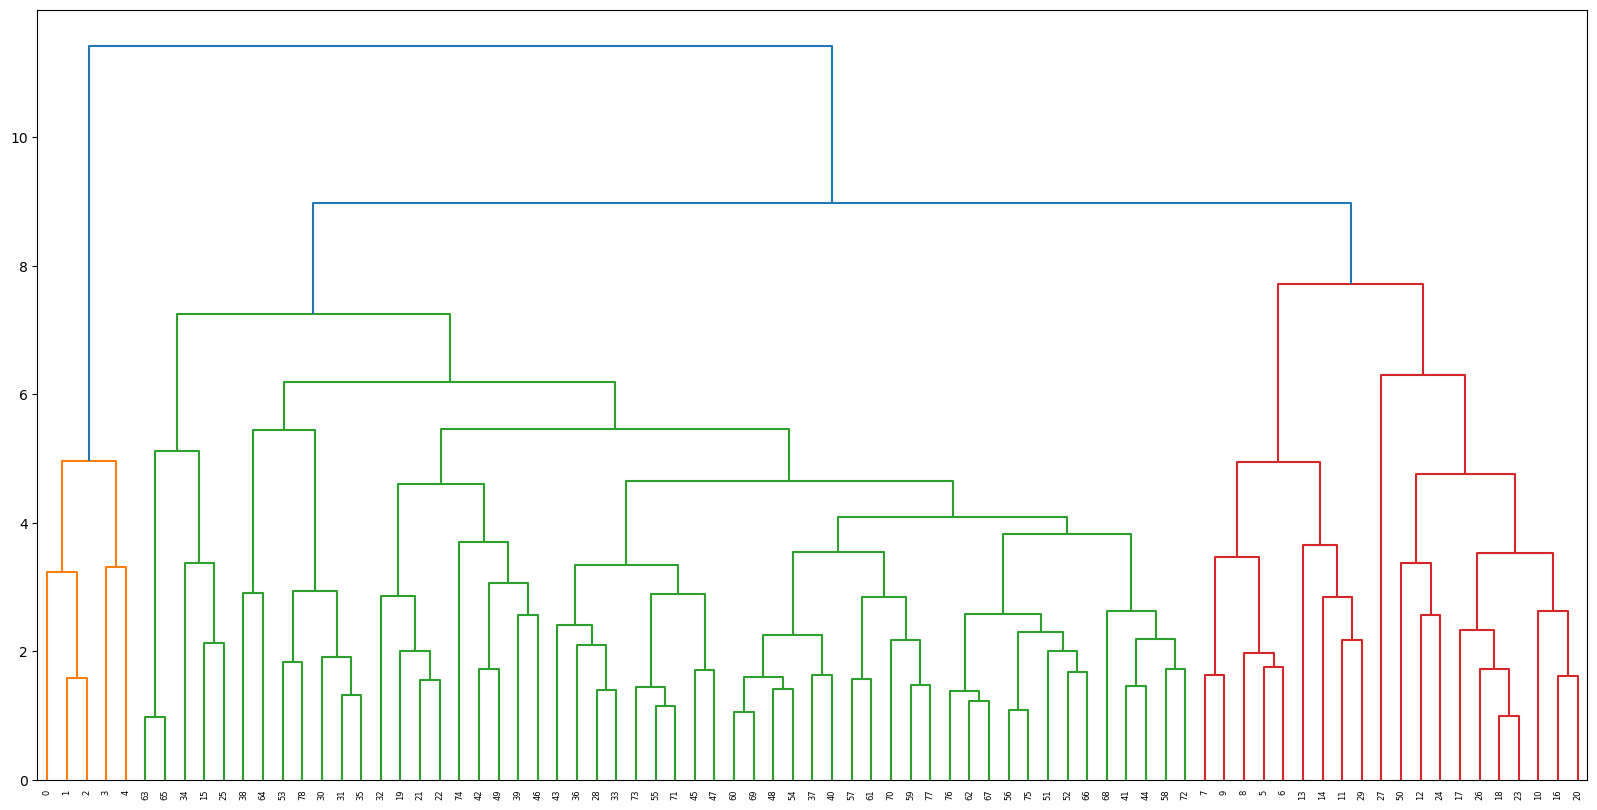

In [99]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [26]:
from scipy.cluster.hierarchy import cut_tree

In [100]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [101]:
# assign cluster labels
df_hc = df.copy()
df_hc.head()
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0


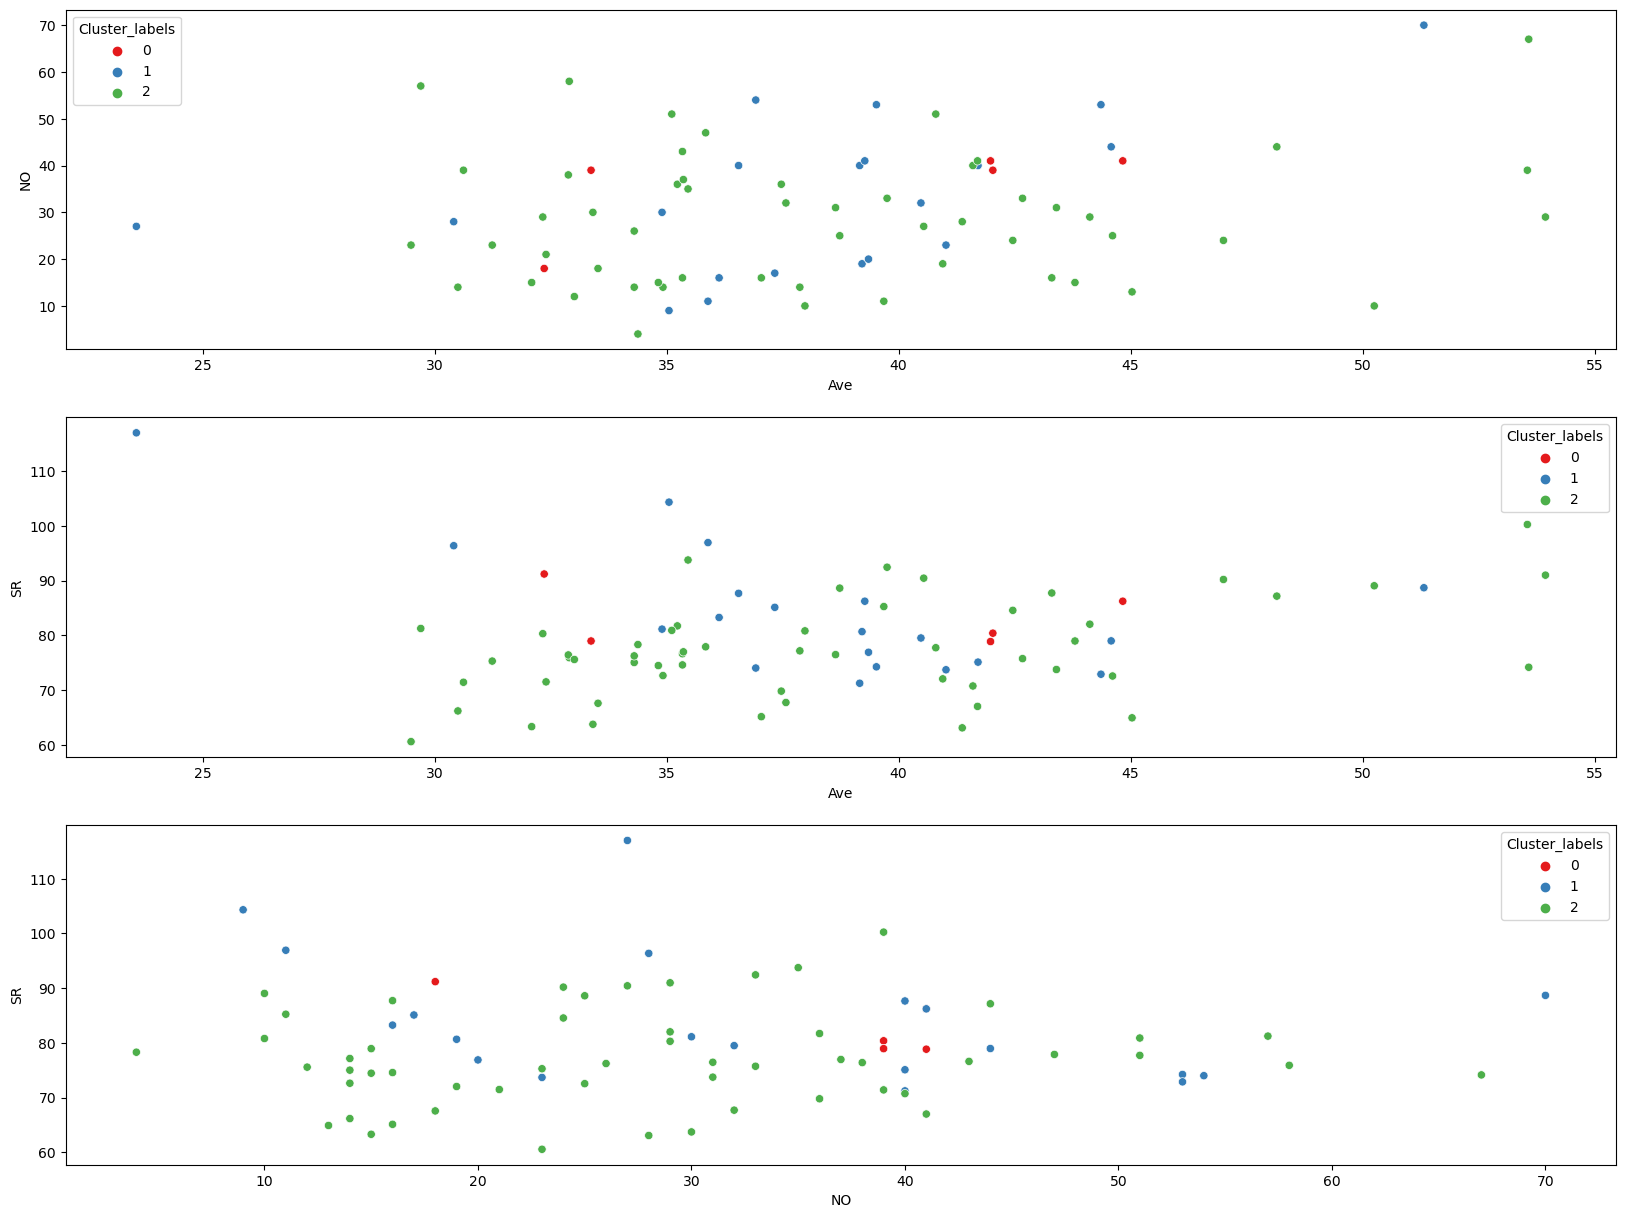

In [102]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Ave', y = 'NO',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

In [110]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0


In [111]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
#MiddleOrders

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
24,V Sehwag (Asia/ICC/INDIA),251,245,9,8273,219,35.05,7929,104.33,15,38,14,14,1
12,AC Gilchrist (AUS/ICC),287,279,11,9619,172,35.89,9922,96.94,16,55,19,12,1
26,HH Gibbs (SA),248,240,16,8094,175,36.13,9721,83.26,21,37,22,14,1
17,CH Gayle (ICC/WI),269,264,17,9221,215,37.33,10834,85.11,22,47,23,16,1
18,Saeed Anwar (PAK),247,244,19,8824,194,39.21,10938,80.67,20,43,15,14,1
23,ME Waugh (AUS),244,236,20,8500,173,39.35,11053,76.90,18,50,16,14,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1
27,Shahid Afridi (Asia/ICC/PAK),398,369,27,8064,124,23.57,6892,117.00,6,39,30,19,1
50,BB McCullum (NZ),260,228,28,6083,166,30.41,6312,96.37,5,32,20,14,1
16,PA de Silva (SL),308,296,30,9284,145,34.90,11443,81.13,11,64,17,19,1


In [112]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
#Hitters

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
60,Tamim Iqbal (BDESH),173,171,4,5743,154,34.38,7333,78.31,9,38,16,10,2
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,2
37,GC Smith (Afr/SA),197,194,10,6989,141,37.98,8648,80.81,10,47,8,11,2
70,G Gambhir (INDIA),147,143,11,5238,150,39.68,6144,85.25,11,34,11,10,2
54,Mohammad Hafeez (PAK),190,190,12,5876,140,33.01,7774,75.58,11,32,16,14,2
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,2
66,IR Bell (ENG),161,157,14,5416,141,37.87,7019,77.16,4,35,6,11,2
36,NJ Astle (NZ),223,217,14,7090,145,34.92,9760,72.64,16,41,19,12,2
48,WU Tharanga (Asia/SL),204,193,14,6140,174,34.30,8183,75.03,14,34,15,12,2
71,ADR Campbell (ZIM),188,184,14,5185,131,30.50,7834,66.18,7,30,11,11,2


In [106]:
df_hc[df_hc['Cluster_labels']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()


,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels


In [107]:
# Final List of Players who can appointed in a new team for Batsman role

In [108]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyHC['Player']
FinalListbyHC.reset_index(drop=True).Player[:]

0         Tamim Iqbal (BDESH)
1                HM Amla (SA)
2           GC Smith (Afr/SA)
3           G Gambhir (INDIA)
4       Mohammad Hafeez (PAK)
5           CG Greenidge (WI)
6               IR Bell (ENG)
7               NJ Astle (NZ)
8       WU Tharanga (Asia/SL)
9          ADR Campbell (ZIM)
10        ML Hayden (AUS/ICC)
11           BRM Taylor (ZIM)
12          Rameez Raja (PAK)
13            MJ Guptill (NZ)
14              DC Boon (AUS)
15             A Flower (ZIM)
16            GW Flower (ZIM)
17             G Kirsten (SA)
18        SP Fleming (ICC/NZ)
19          Younis Khan (PAK)
20           RS Mahanama (SL)
21          IVA Richards (WI)
22          RG Sharma (INDIA)
23             DM Jones (AUS)
24       EJG Morgan (ENG/IRE)
25            MN Samuels (WI)
26            SR Watson (AUS)
27             DL Haynes (WI)
28            V Kohli (INDIA)
29           LRPL Taylor (NZ)
30           Ijaz Ahmed (PAK)
31         RB Richardson (WI)
32        Misbah-ul-Haq (PAK)
33        

In [109]:
df_hc

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,0
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,0
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,0
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,0
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,2
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13,2
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10,2
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11,2
